
## A self-organizing map (SOM) or self-organizing feature map (SOFM) 
is an unsupervised machine learning technique used to produce a low-dimensional (typically two-dimensional) representation of a higher dimensional data set while preserving the topological structure of the data. For example, a data set with p variables measured in n observations could be represented as clusters of observations with similar values for the variables. These clusters then could be visualized as a two-dimensional "map" such that observations in proximal clusters have more similar values than observations in distal clusters. This can make high-dimensional data easier to visualize and analyze.

An SOM is a type of artificial neural network but is trained using competitive learning rather than the error-correction learning (e.g., backpropagation with gradient descent) used by other artificial neural networks. 

We need to install NeuPy because scikit-learn doesn't have SOM/SOFM functionality.

In [12]:
!pip install neupy

## Dataset

In this section, we'll use commonly available Iris Dataset. But, instead of using it as a classification problem, we'll treat it as unsupervised problem (clustering). We'll see how good SOM will predict the cluster based on provide features.

We'll use built-in function from scikit-learn to load the dataset.

In [13]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from neupy import algorithms, utils

plt.style.use('ggplot')
ggplot_colors = plt.rcParams['axes.prop_cycle']
colors = np.array([c['color'] for c in ggplot_colors])

Load data

In [14]:
dataset = datasets.load_iris()
# use only two features in order
# to make visualization simpler
data = dataset.data[:, [2, 3]]
target = dataset.target

Define SOM model

In [15]:
sofm = algorithms.SOFM(
    # Use only two features for the input
    n_inputs=2,

    # Number of outputs defines number of features
    # in the SOFM or in terms of clustering - number
    # of clusters
    n_outputs=3,

    # In clustering application we will prefer that
    # clusters will be updated independently from each
    # other. For this reason we set up learning radius
    # equal to zero
    learning_radius=0,

    # Training step size or learning rate
    step=0.25,

    # Shuffles dataset before every training epoch.
    shuffle_data=True,

    # Instead of generating random weights
    # (features / cluster centers) SOFM will sample
    # them from the data. Which means that after
    # initialization step 3 random data samples will
    # become cluster centers
    weight='sample_from_data',

    # Shows training progress in terminal
    verbose=True,
)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.25
[OPTION] train_end_signal = None
[OPTION] n_inputs = 2
[OPTION] distance = euclid
[OPTION] features_grid = None
[OPTION] grid_type = rect
[OPTION] learning_radius = 0
[OPTION] n_outputs = 3
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = sample_from_data



Train!

In [16]:
sofm.train(data, epochs=200)


Start training

[TRAINING DATA] shapes: (150, 2)
[TRAINING] Total epochs: 200

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.25977 |           - |       27 ms |
|           2 |     0.24793 |           - |       22 ms |
|           3 |     0.25515 |           - |       24 ms |
|           4 |     0.24386 |           - |       23 ms |
|           5 |     0.23591 |           - |       25 ms |
|           6 |     0.24012 |           - |       28 ms |
|           7 |     0.24969 |           - |       20 ms |
|           8 |     0.24856 |           - |       20 ms |
|           9 |     0.25489 |           - |       22 ms |
|          10 |      0.2443 |           - |       47 ms |
|          11 |     0.25308 |           - |       37 ms |
|          12 |     0.24745 |           - |       51 ms |
|          13 |     0.24786 |           - |       

Evaluate!

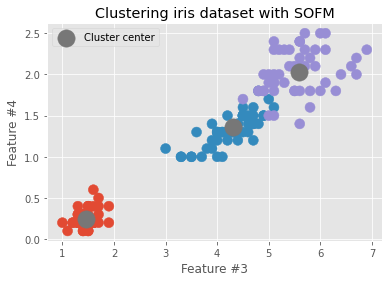

In [17]:
plt.title('Clustering iris dataset with SOFM')
plt.xlabel('Feature #3')
plt.ylabel('Feature #4')

plt.scatter(*data.T, c=colors[target], s=100, alpha=1)
cluster_centers = plt.scatter(*sofm.weight, s=300, c=colors[3])

plt.legend([cluster_centers], ['Cluster center'], loc='upper left')
plt.show()